In [1]:
#Import Nescessary Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

In [2]:
#Loading Forms
#Ignore Lines Starting With #
#Ensure You Put This File With Your Excels/CSVs... In One Folder
#Change the forms' names to yours and then just need to run the program!
df_week = pd.read_csv("data-export_week_0120.csv",comment="#")
df_month = pd.read_csv("data-export_month_0114.csv",comment="#")
df_halfyear = pd.read_csv("data-export_halfyear_0114.csv",comment="#")

In [3]:
#Preview Data
#Check if you loaded them successfully
print(df_week.head())#5 rows as default
print(df_month.head())
print(df_halfyear.head())

                          Landing page  Sessions  Users  New users  \
0  /internships/internship-application       430    395        371   
1                                    /       226    203        155   
2                /stage/archives/40710       146    136        133   
3        /internships/meet-our-interns        67     65         63   
4                         /internships        66     58         39   

   Average engagement time per session  Conversions  Total revenue  
0                            23.665116            0              0  
1                           143.973451            0              0  
2                            62.986301            0              0  
3                            46.074627            0              0  
4                            79.257576            0              0  
                          Landing page  Sessions  Users  New users  \
0                         /internships      1629   1504       1454   
1                        

In [4]:
#Only Sessions; Users; New Users; Average engagement time per session are meaningful here
#Below will be using bar charts & pie charts

In [5]:
#Bar Chart For Three Periods (since there might be many pages in interest, I don't use side-by-side bar plot, I use normal bar plot)
df_comb = [df_week, df_month, df_halfyear]#Combination of three period's forms
subtitle_comb = ["Last Week", "Last Month", "Last 6 Month"]#Combination of different titles
def barplot_landing(column,
                    num=10,#Num determines how many countries on the graph, sorted and get the first num
                    figsize1=20,#Figure width
                    figsize2=20,#Figure height
                    xfont=20,#Xlabel fontsize
                    yfont=20,#Ylabel fontsize
                    labelfont=20,#Label fontsize
                    titlefont=20,#Whole title fontsize
                    legend_1font=20,#Internal legend fontsize
                    subfont=20,#Subtitle fontsize
                    textfont=20,#Text after bar: fontsize
                    legtitle=30#Legend title font size
                    ):#When running functions, lease adjust parameters if you want
    
    #Initialization
    plt.figure(figsize=(figsize1, figsize2))#Set fig size
    
    #Construction of plots
    for i in range(3):
        df = df_comb[i].sort_values(by=column, ascending=False).head(num)#Sort: please do not let df_comb appears later anymore
        #Loop each dataframes and draw them on a same graph
        plt.subplot(3,1,(i+1))#Set subplots: three rows one column
        #We are only interested in the first 10 (default) largest (sorted)
        bars = plt.barh((df)["Landing page"], (df)[column])#Draw horizontal bar charts
        #Annotate each bar with the exact value
        for bar in bars:
            value = bar.get_width()#Get the width of the bar (the value that the bar represents)
            plt.text(value, bar.get_y() + bar.get_height()/2,#Place in the middle
                     f'{value}',#Text
                     va='center', ha='left',fontsize=textfont)#Locate text inside
        plt.xlabel(column,fontsize=xfont)#Label X-axis
        plt.ylabel("Landing Pages",fontsize=yfont)#Label Y-axis
        plt.yticks(df["Landing page"],fontsize=labelfont)#Add ticks
        plt.title(subtitle_comb[i],fontsize=titlefont)#Set subtitle
        #Set legend
        #Create legend's content by looping
        legend_handles = [Patch(label=f"{name}: {count:.2f} units per session")#Legend's content
                          for name, count in (zip((df)["Landing page"], (df)["Average engagement time per session"]))]
        #Place the legend outside
        plt.legend(handles=legend_handles, title="Average Engagement Time Per Session",
                   fontsize=legend_1font, bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=legtitle)
    plt.suptitle(f"{column} For Landing Pages",fontsize=subfont)#Set whole title
    
    #Show
    plt.show()#Display

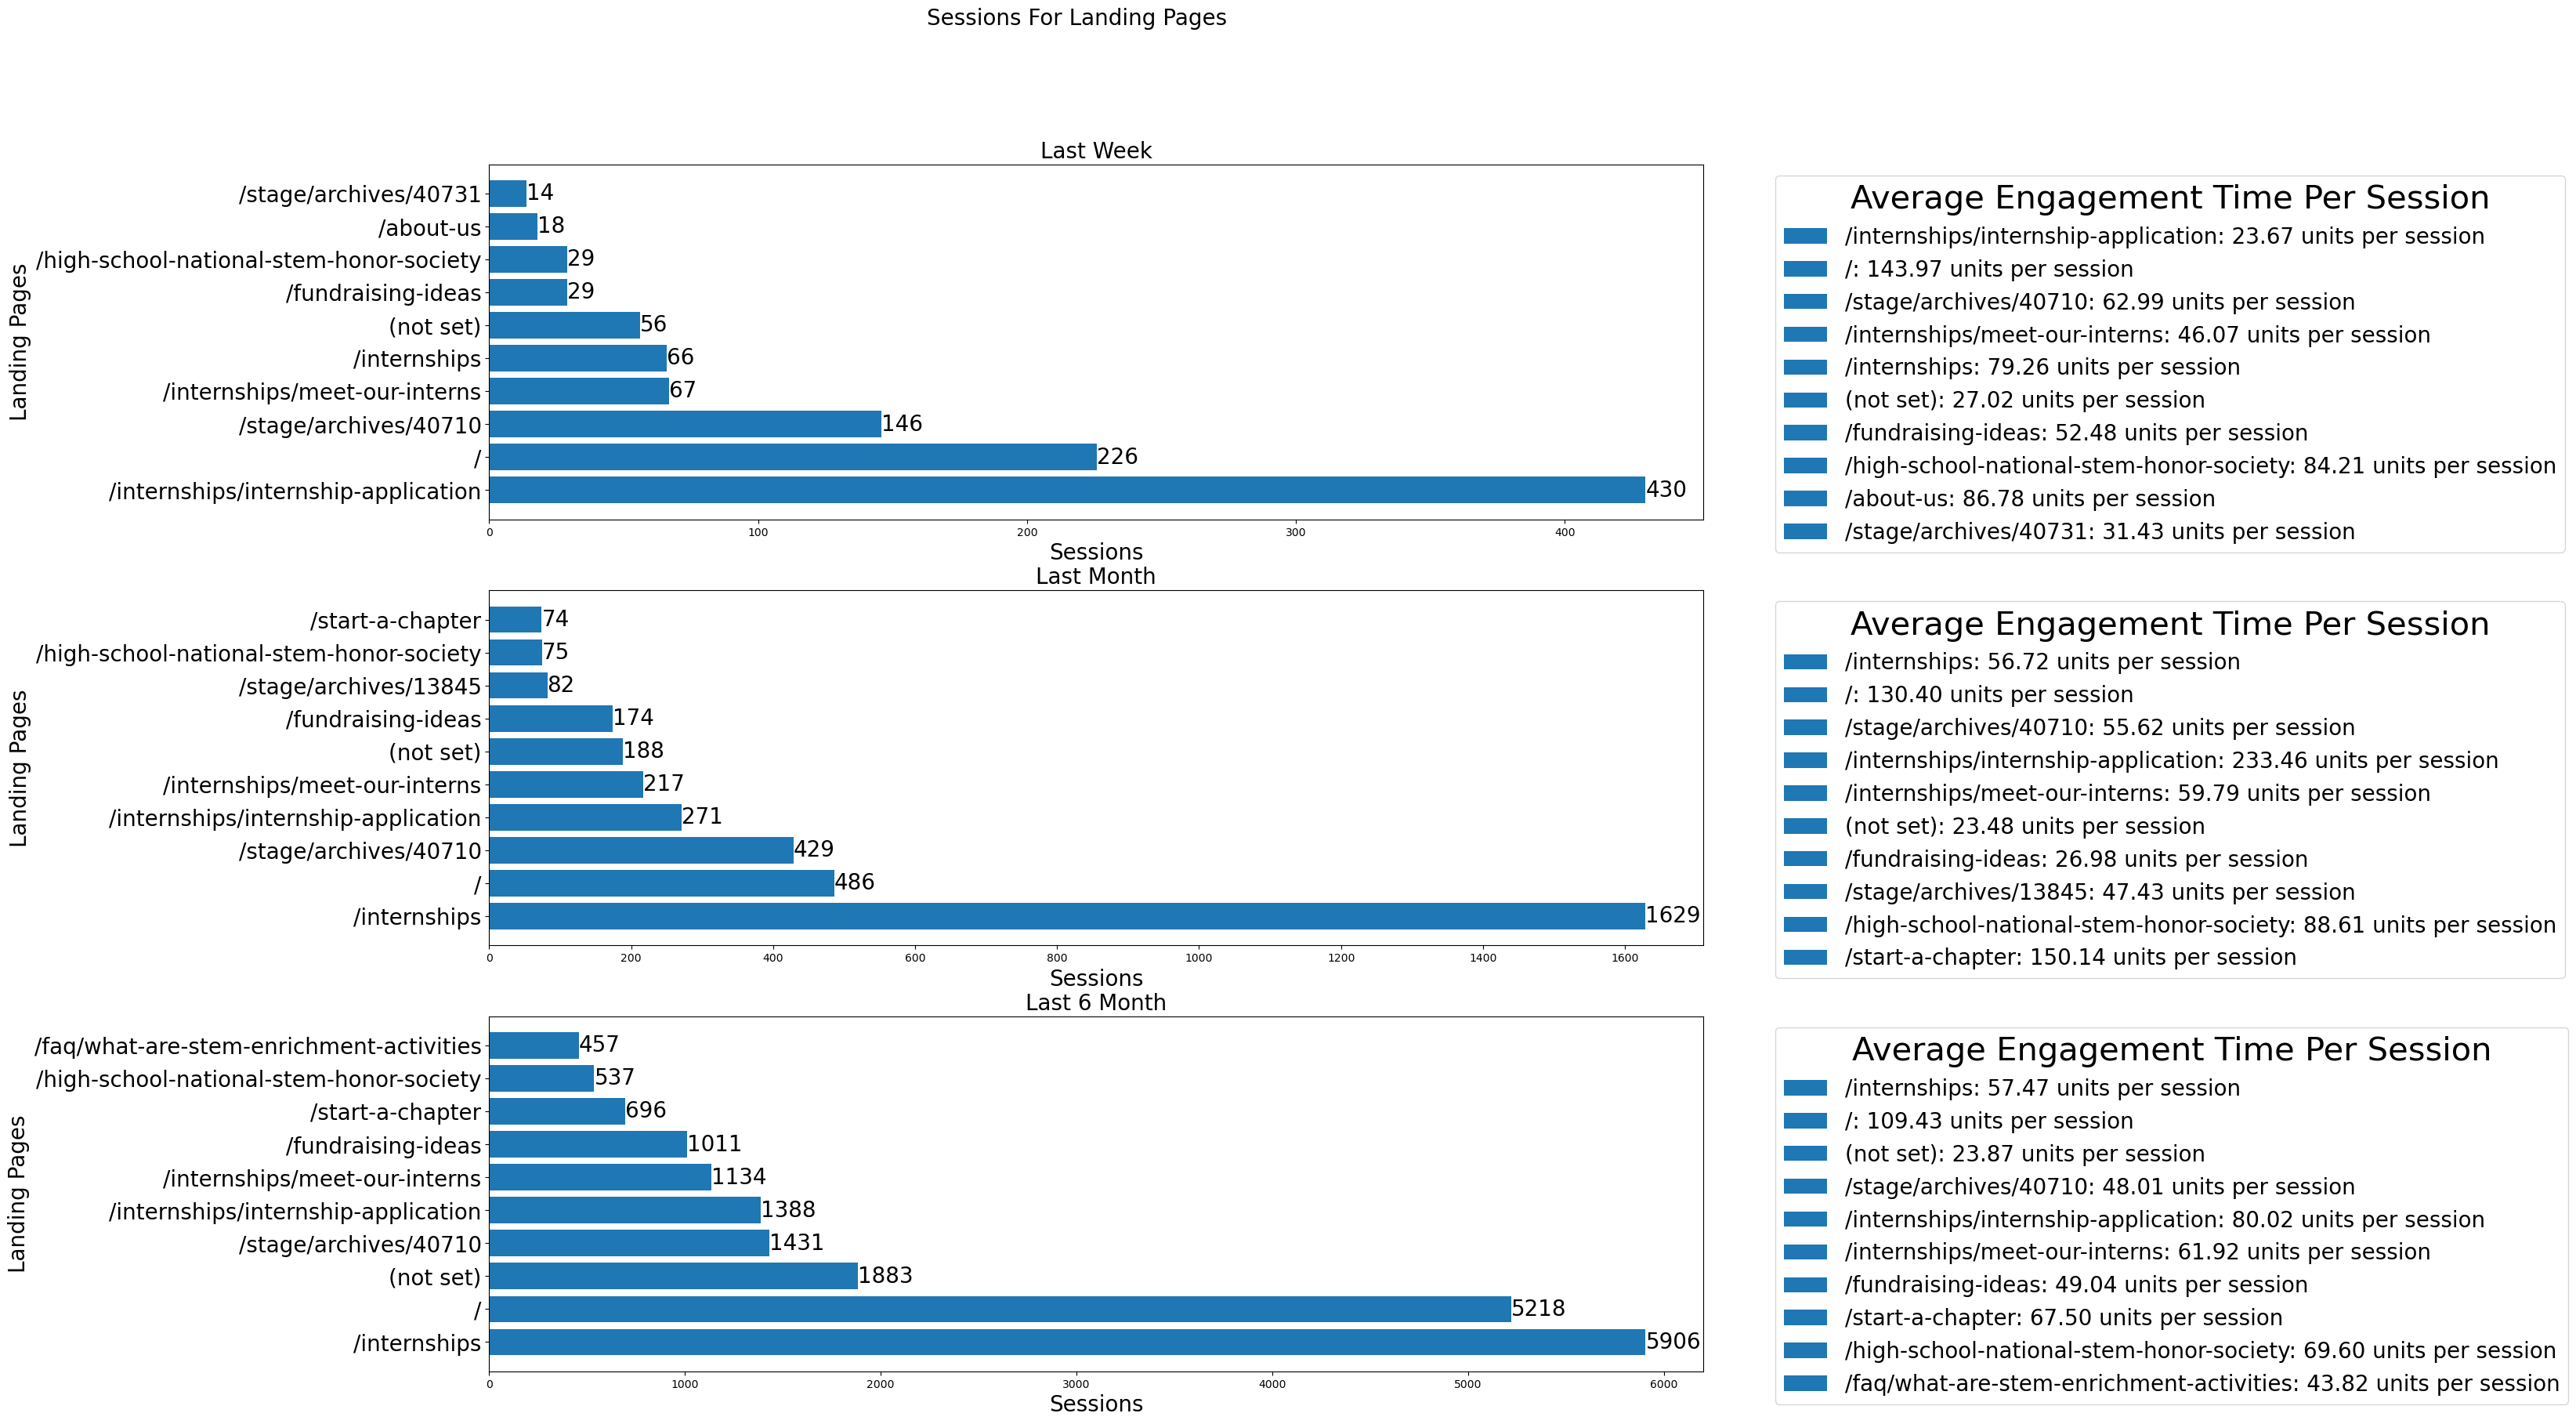

In [6]:
#Sessions: Barplot
barplot_landing(column="Sessions")

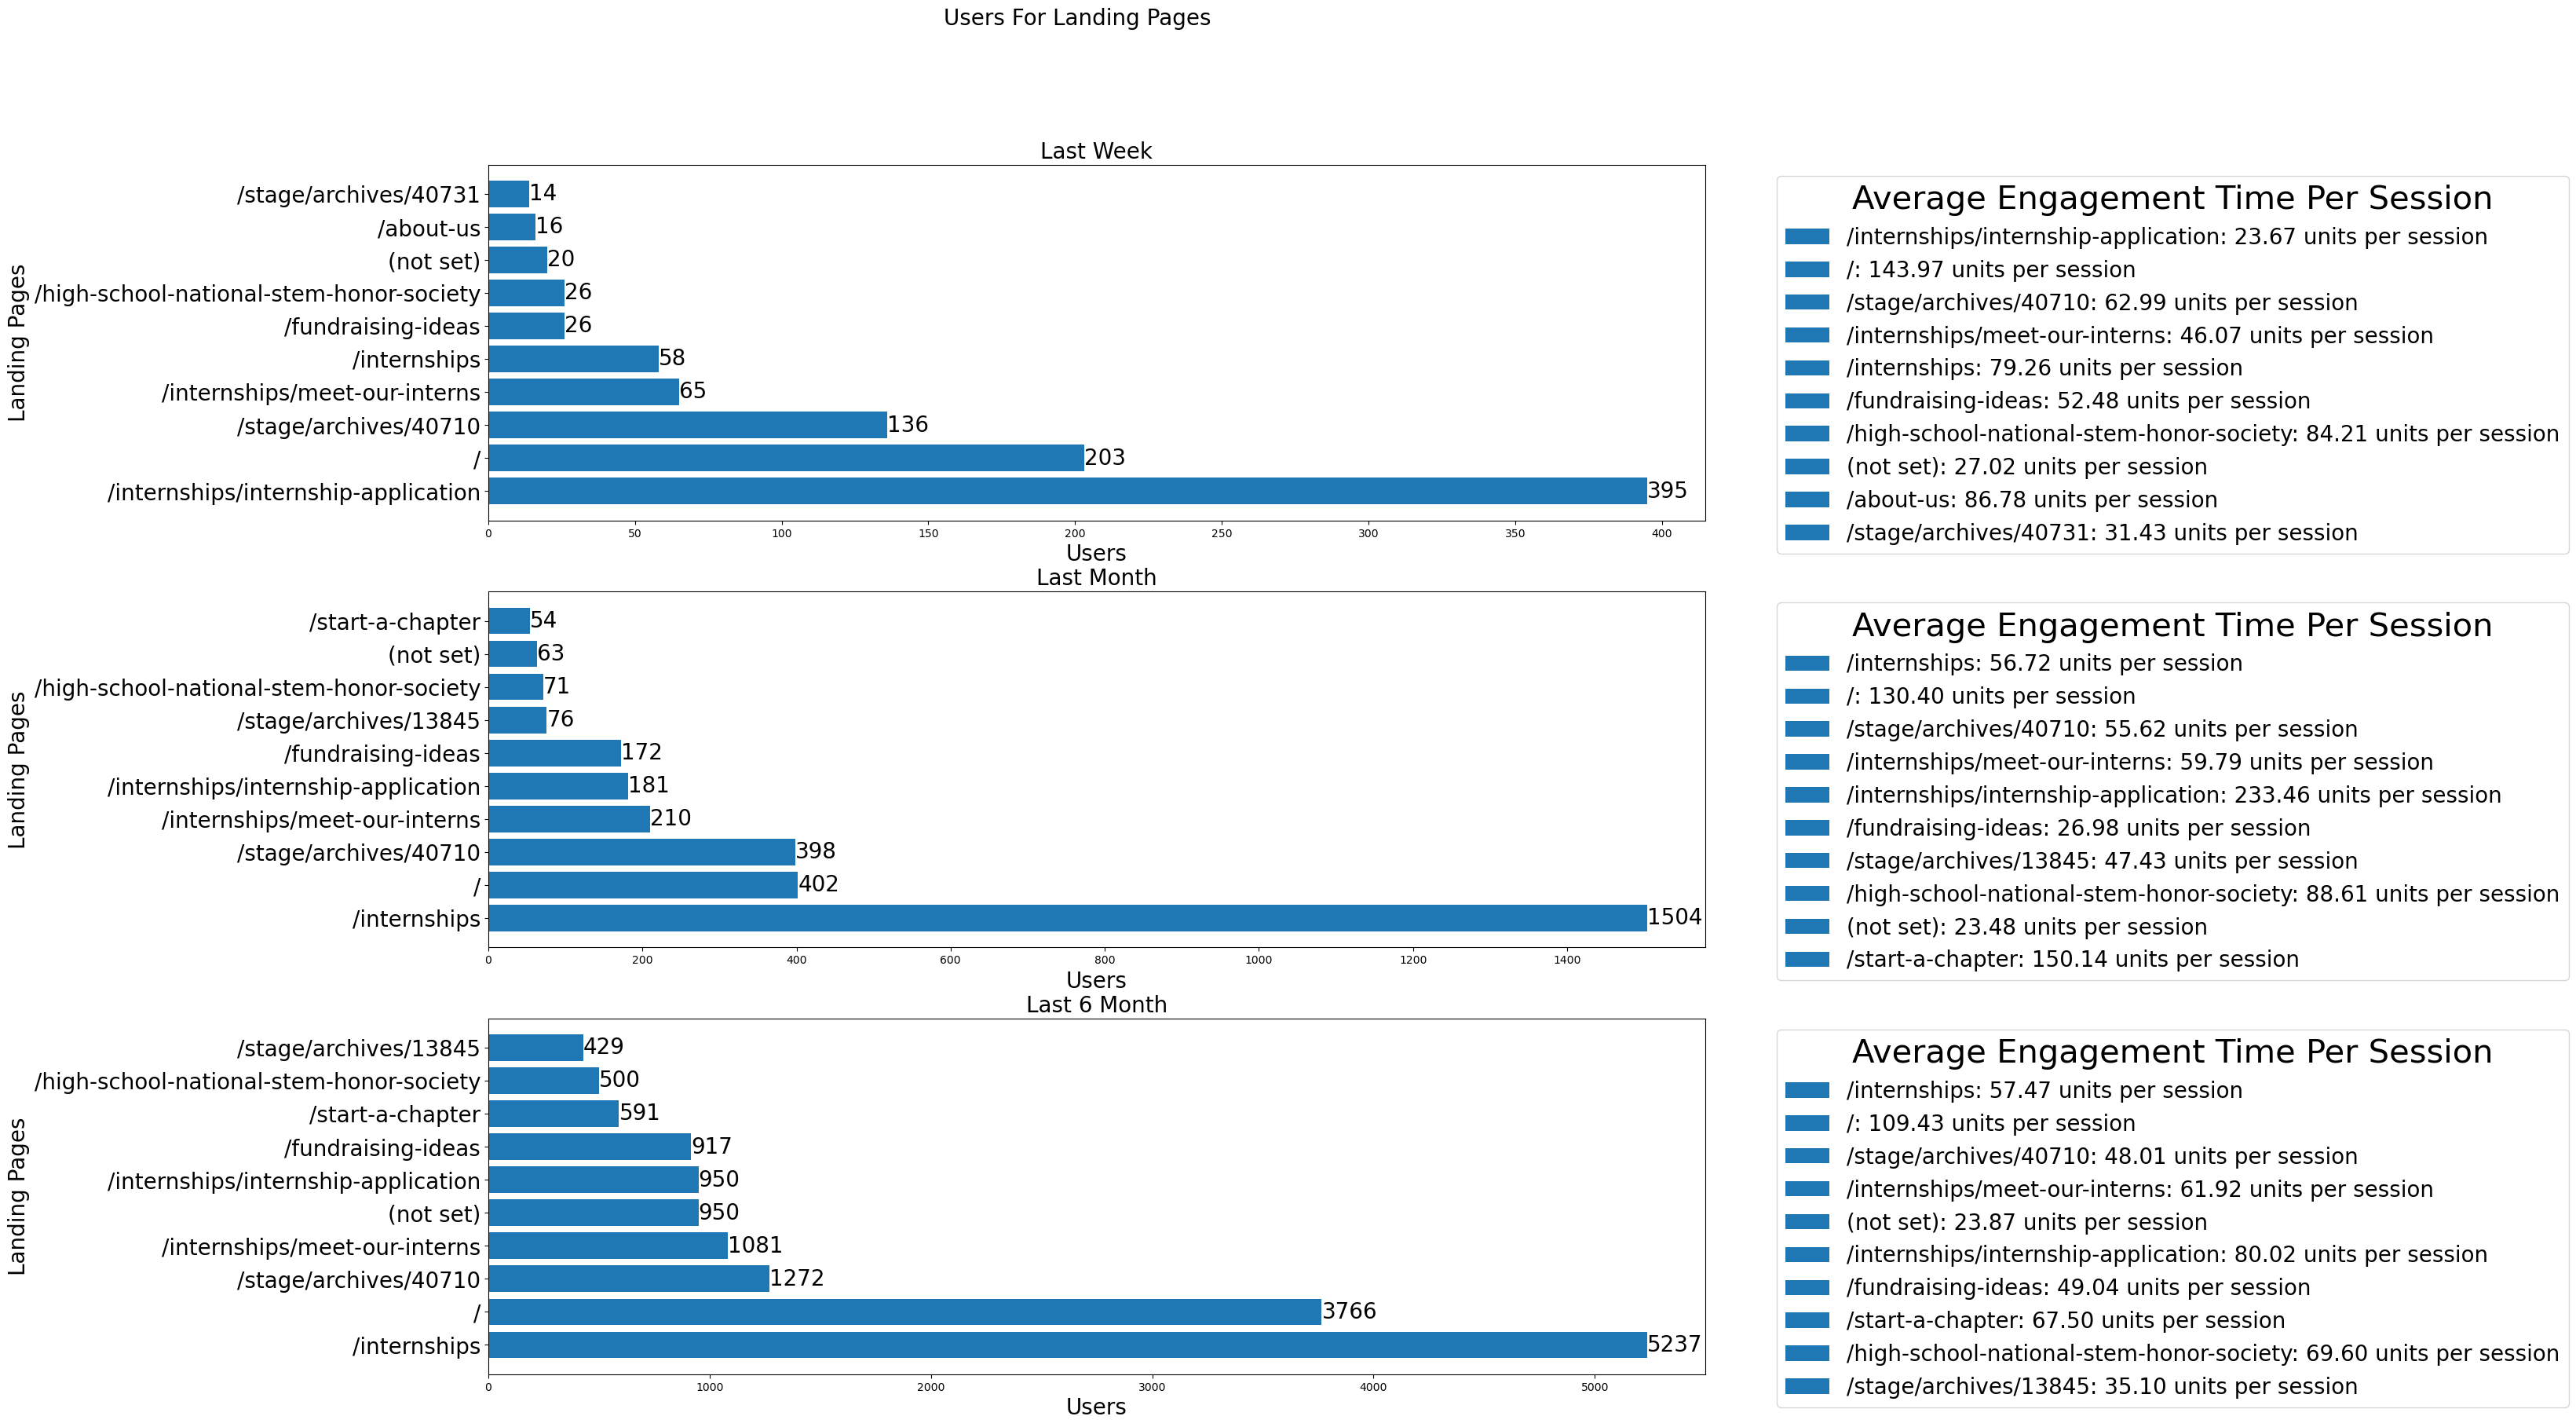

In [7]:
#Users: Barplot
barplot_landing(column="Users")

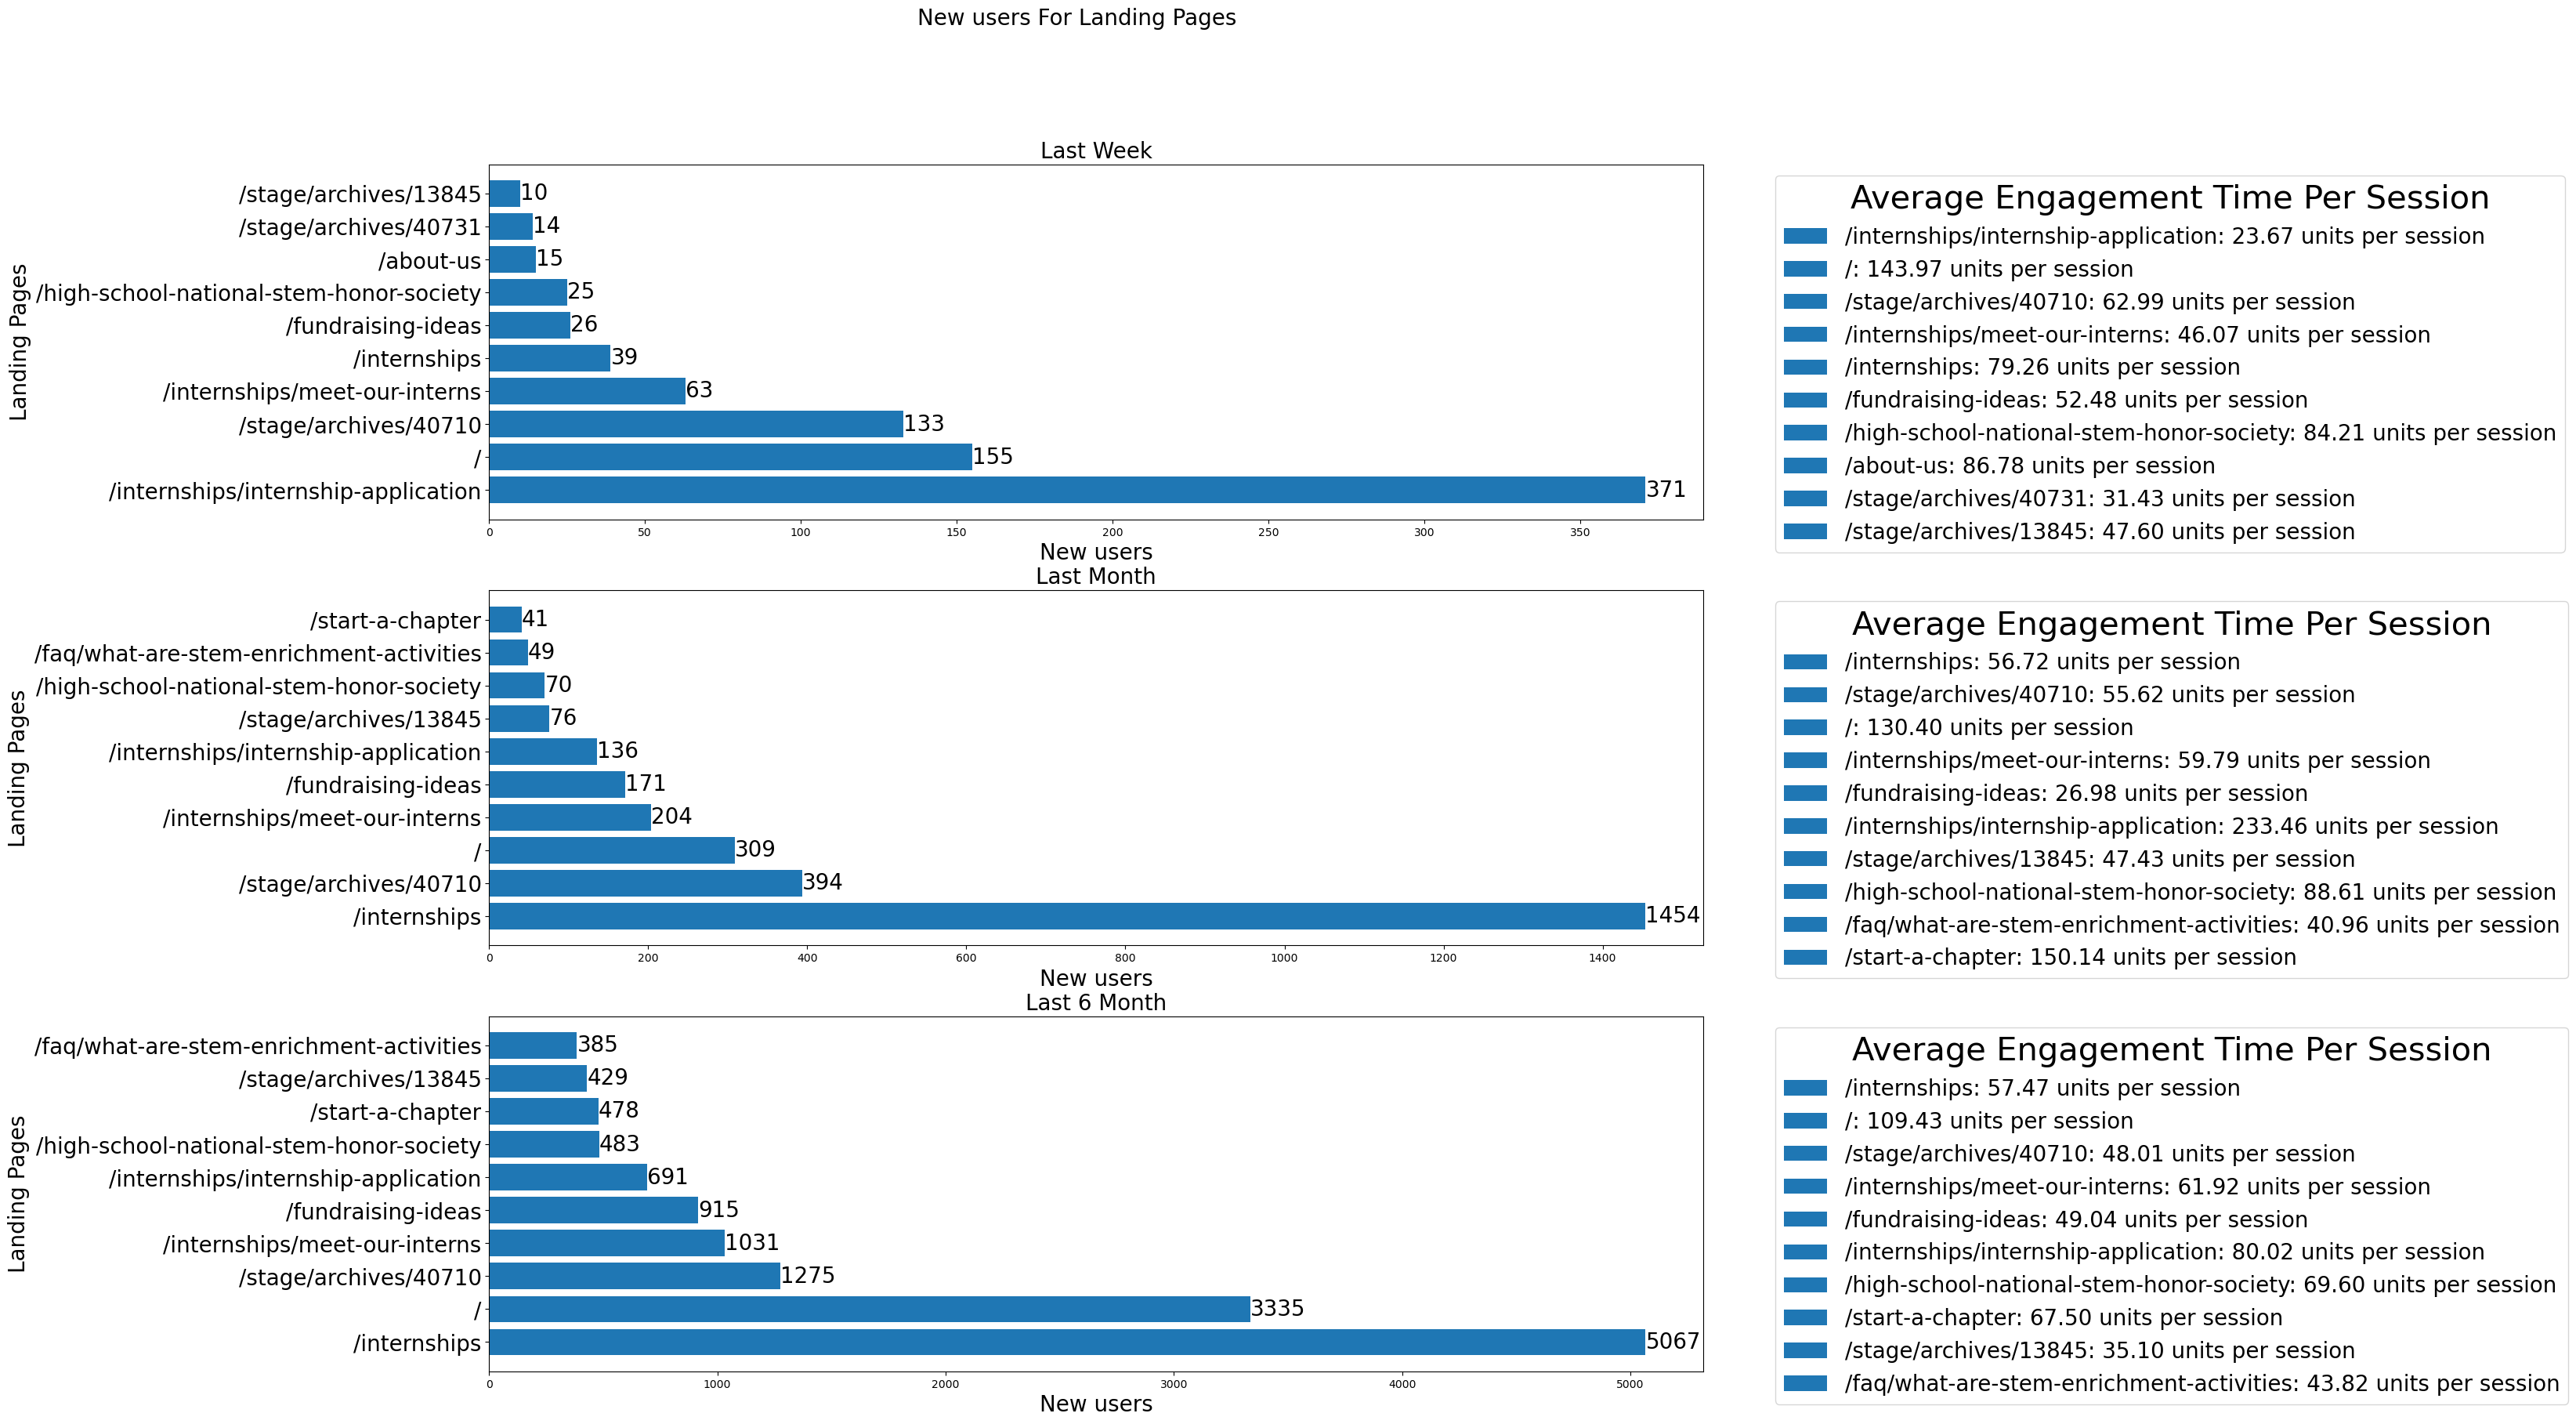

In [8]:
#New Users: Barplot
barplot_landing(column="New users")

In [9]:
#Pie Chart For Three Periods
#Note that pie chart is used to show percentages
def pieplot_landing(column,
                    figsize1=20,#Figure's width
                    figsize2=20,#Figure's height
                    show=0.02,#Threshold of display of percentage
                    font=10,#Text fontsize, including labels & inside text
                    titlefont=20,#Title fontsize
                    subfont=20,#Subtitle fontsize
                    labeldisplay=7#Threshold to display the first labeldisplay largest's names
                    ):#When running functions, lease adjust parameters if you want
    
    #Initialization
    plt.figure(figsize=(figsize1, figsize2))
    
    # Function to decide whether to display the percentage on the slice
    def autopct_format(values):
        def my_autopct(pct):
            total = sum(values)#Get total, values is a list of value
            val = int(round(pct*total/100.0))#Get percentage
            if val > (total * show):#If the slice is larger than 5% (default) of the total then display the percentage on plot
                return '{p:.2f}%'.format(p=pct)#Round to two decimal places
            else:
                return ''#Do not show
        return my_autopct
    
    #Construction of plots
    for i in range(3):
        #Sort: make the dimension decreasing
        df = df_comb[i].sort_values(by=column, ascending=False)
        plt.subplot(3,1,(i+1))
        labels_ = (df)["Landing page"]#Labels of pie chart, act as a vector
        labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest
        sizes = df[column]#Get exact values' list, for future text usage
        #We are interested in all now, since it is a pie chart
        #Draw pie chart according to percentage, set label size
        plt.pie(df[column], labels = labels_,textprops={'fontsize': font}, autopct=autopct_format(sizes))#autopct controls text inside
        plt.title(subtitle_comb[i],fontsize=titlefont)
    plt.suptitle(f"{column} For Landing Pages",fontsize=subfont)
    
    #Show
    plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_716\3723849429.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


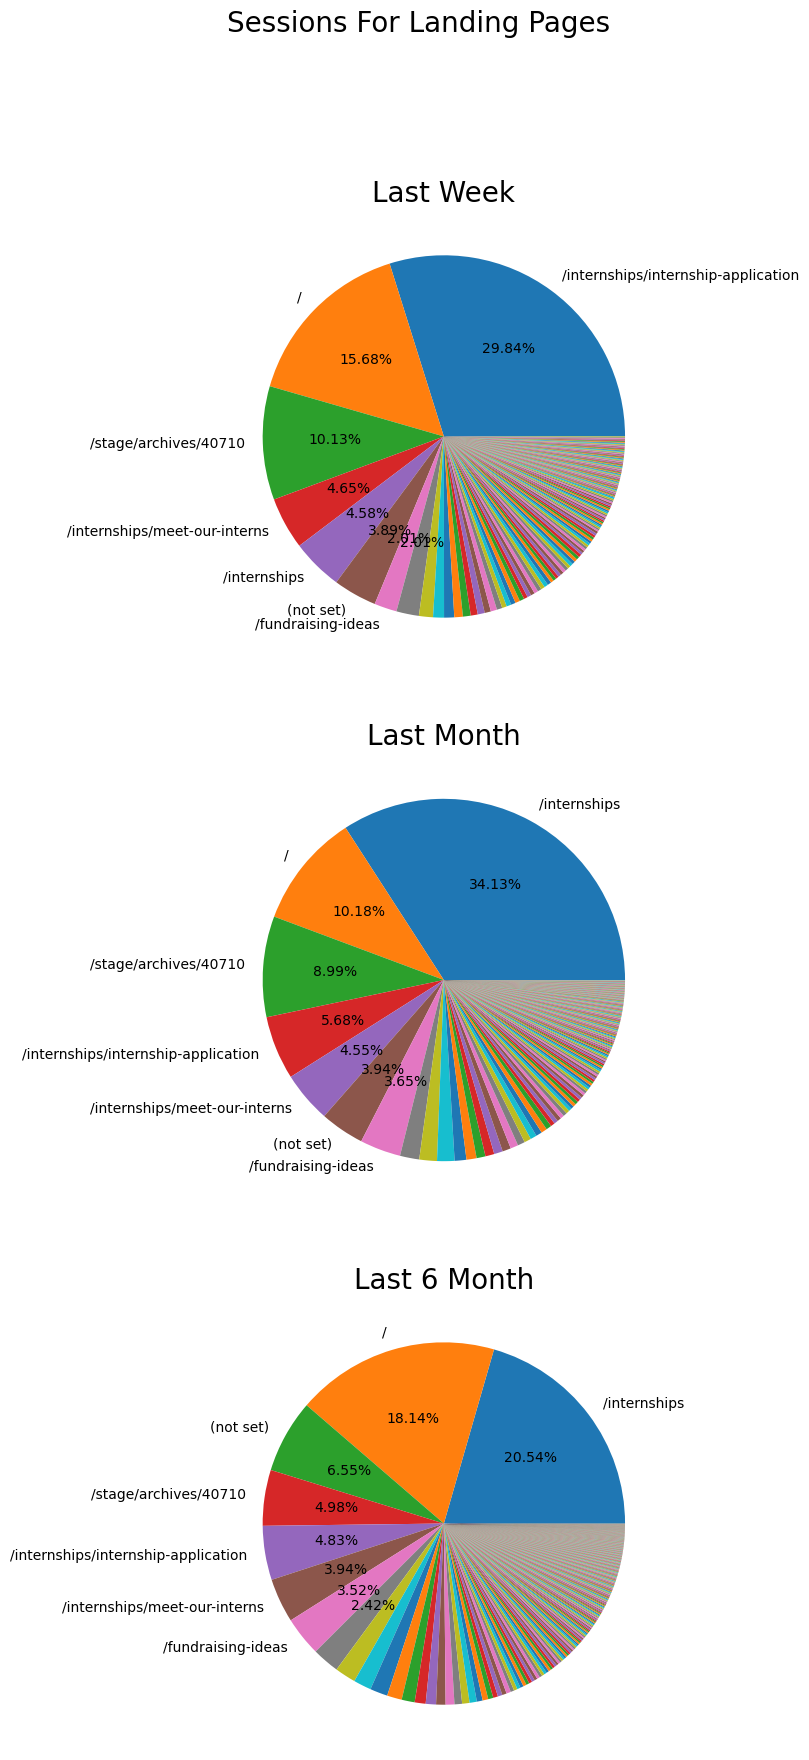

In [10]:
#Sessions: Pieplot
pieplot_landing(column="Sessions")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_716\3723849429.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


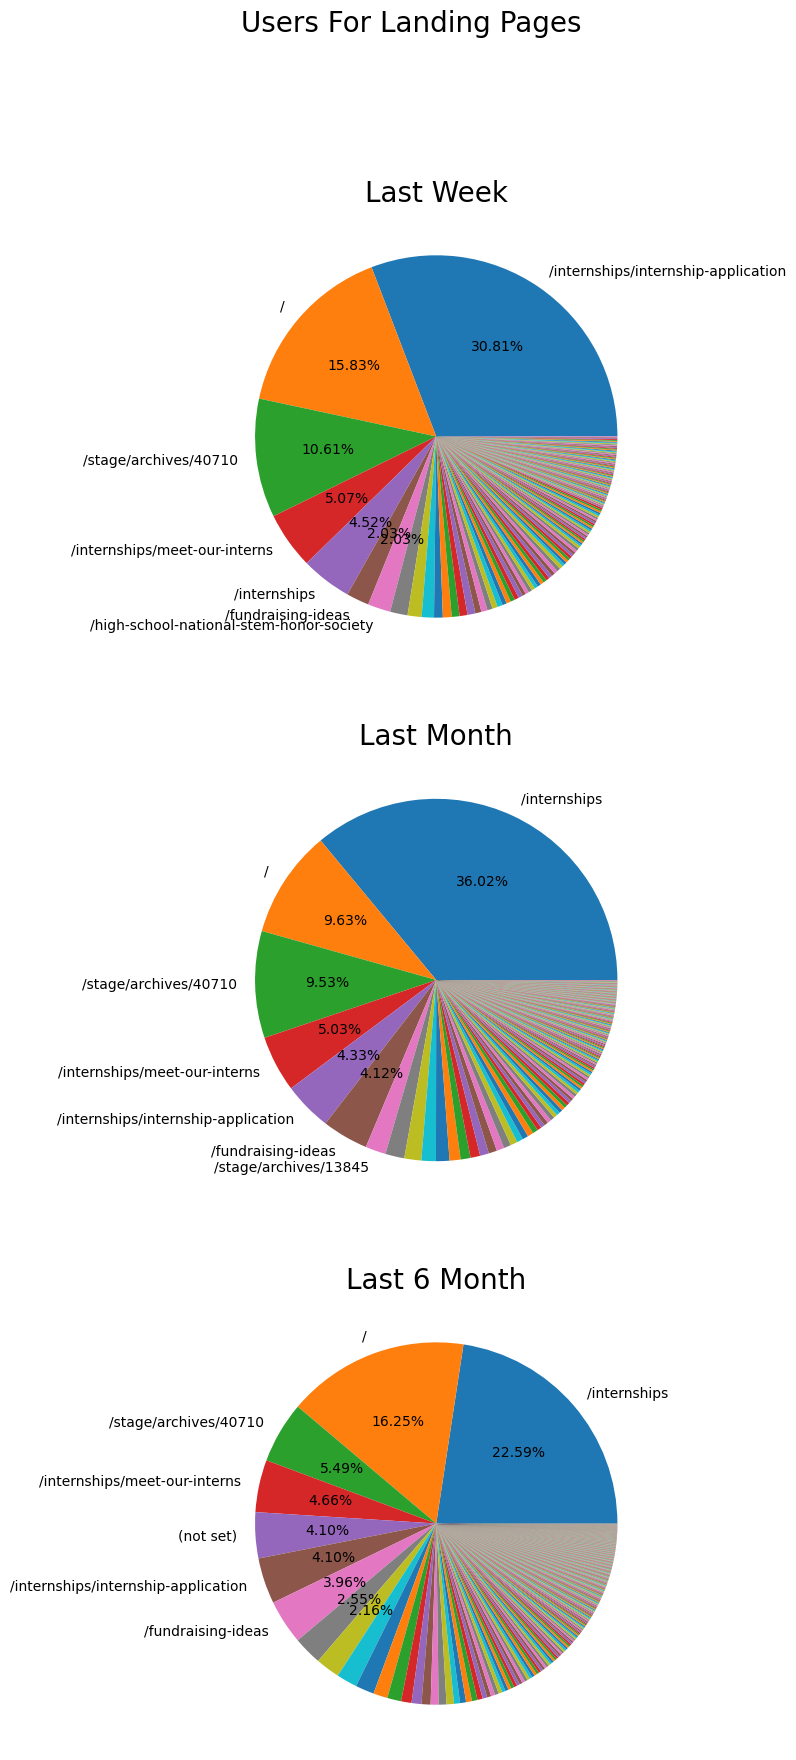

In [11]:
#Users: Pieplot
pieplot_landing(column="Users")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_716\3723849429.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


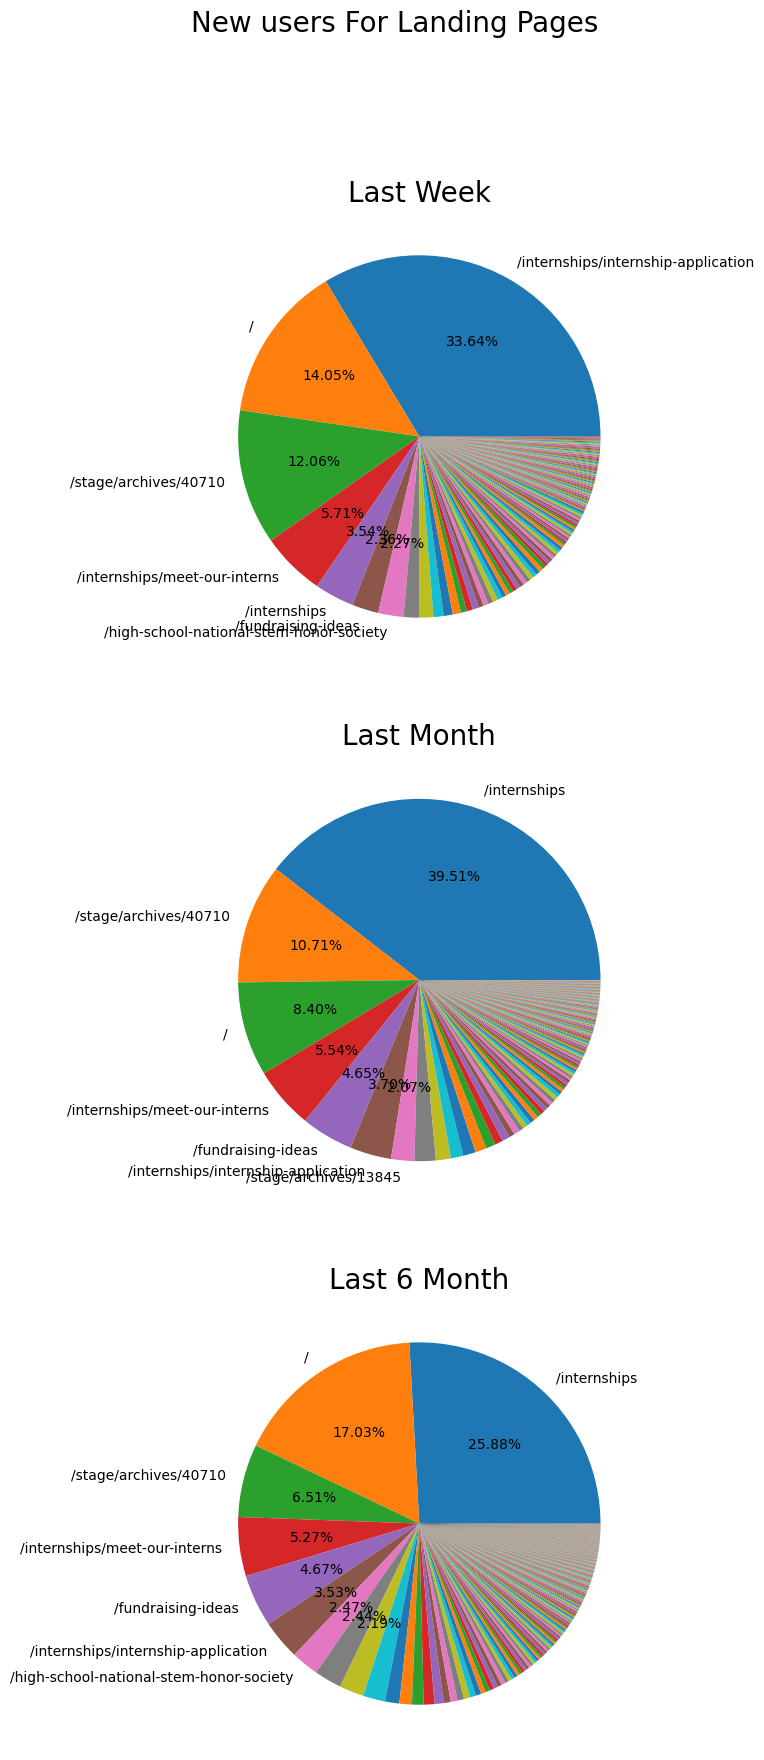

In [12]:
#New Users: Pieplot
pieplot_landing(column="New users")

In [13]:
#Click File on the topleft, then click Print Preview to show the output, then make screenshots!